In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_full = y_train_full.flatten()
y_test = y_test.flatten()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

### Variasi 1

<p>
Spesifikasi:<br/>
1 layer konvolusi: filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
1 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [3]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

C:\Users\Nicholas R. Sihite\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2683 - loss: 1.9913 - val_accuracy: 0.4186 - val_loss: 1.5712
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4515 - loss: 1.5094 - val_accuracy: 0.5197 - val_loss: 1.3641
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5269 - loss: 1.3184 - val_accuracy: 0.5410 - val_loss: 1.2912
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5602 - loss: 1.2208 - val_accuracy: 0.5635 - val_loss: 1.2383
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5877 - loss: 1.1455 - val_accuracy: 0.5782 - val_loss: 1.1881
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6011 - loss: 1.1114 - val_accuracy: 0.5935 - val_loss: 1.1444
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6182 - loss: 1.0696 - val_accuracy: 0.5900 - val_loss: 1.1421
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6288 - loss: 1.0392 - val_accura

### Variasi 2

<p>
Spesifikasi:<br/>
2 layer konvolusi: filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [4]:
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3241 - loss: 1.8300 - val_accuracy: 0.5127 - val_loss: 1.3779
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5248 - loss: 1.3350 - val_accuracy: 0.5590 - val_loss: 1.2342
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5843 - loss: 1.1740 - val_accuracy: 0.6114 - val_loss: 1.1176
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6272 - loss: 1.0623 - val_accuracy: 0.6298 - val_loss: 1.0591
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6501 - loss: 0.9949 - val_accuracy: 0.6342 - val_loss: 1.0349
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6730 - loss: 0.9393 - val_accuracy: 0.6368 - val_loss: 1.0449
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6886 - loss: 0.8912 - val_accuracy: 0.6631 - val_loss: 0.9651
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7078 - loss: 0.8382 - val_accu

### Variasi 3

<p>
Spesifikasi:<br/>
3 layer konvolusi: filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
3 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [5]:
model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.2825 - loss: 1.9355 - val_accuracy: 0.4206 - val_loss: 1.5890
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4523 - loss: 1.5102 - val_accuracy: 0.5097 - val_loss: 1.3566
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5195 - loss: 1.3360 - val_accuracy: 0.5182 - val_loss: 1.3464
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5567 - loss: 1.2385 - val_accuracy: 0.5640 - val_loss: 1.2355
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5904 - loss: 1.1534 - val_accuracy: 0.6028 - val_loss: 1.1273
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6058 - loss: 1.1013 - val_accuracy: 0.6219 - val_loss: 1.0778
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6311 - loss: 1.0460 - val_accuracy: 0.6099 - val_loss: 1.1020
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6458 - loss: 1.0072 - val_acc

In [6]:
def evaluate_model(model, x_test, y_test, history):
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    print(classification_report(y_test, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluasi Model 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.72      0.65      0.68      1000
           1       0.71      0.76      0.74      1000
           2       0.47      0.49      0.48      1000
           3       0.44      0.33      0.38      1000
           4       0.54      0.50      0.52      1000
           5       0.53      0.50      0.52      1000
           6       0.62      0.80      0.70      1000
           7       0.72      0.69      0.70      1000
           8       0.68      0.78      0.73      1000
           9       0.68      0.68      0.68      1000

    accuracy                           0.62     10000
   macro avg       0.61      0.62      0.61     10000
weighted avg       0.61      0.62      0.61     10000

Macro F1-score: 0.6118


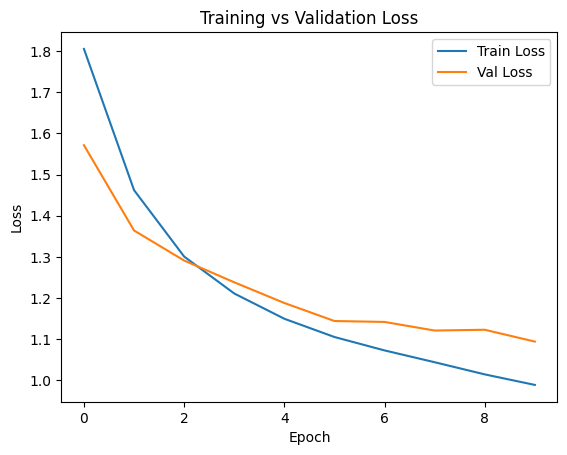

0.6117652068349478

In [7]:
evaluate_model(model_1, x_test, y_test, history_1)

### Evaluasi Model 2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.77      0.62      0.69      1000
           1       0.81      0.77      0.79      1000
           2       0.64      0.44      0.52      1000
           3       0.53      0.45      0.49      1000
           4       0.58      0.67      0.62      1000
           5       0.58      0.58      0.58      1000
           6       0.67      0.84      0.75      1000
           7       0.64      0.79      0.71      1000
           8       0.81      0.74      0.78      1000
           9       0.70      0.80      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

Macro F1-score: 0.6661


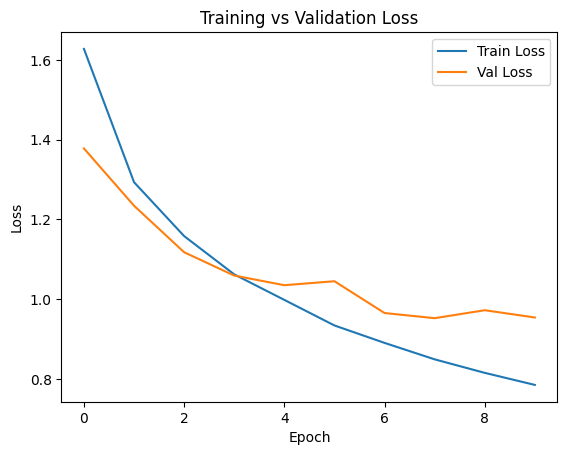

0.666083577307816

In [8]:
evaluate_model(model_2, x_test, y_test, history_2)

### Evaluasi Model 3

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.79      0.56      0.65      1000
           1       0.73      0.81      0.77      1000
           2       0.61      0.42      0.50      1000
           3       0.46      0.49      0.48      1000
           4       0.56      0.60      0.58      1000
           5       0.61      0.48      0.54      1000
           6       0.66      0.80      0.72      1000
           7       0.63      0.73      0.68      1000
           8       0.68      0.84      0.75      1000
           9       0.76      0.73      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000

Macro F1-score: 0.6415


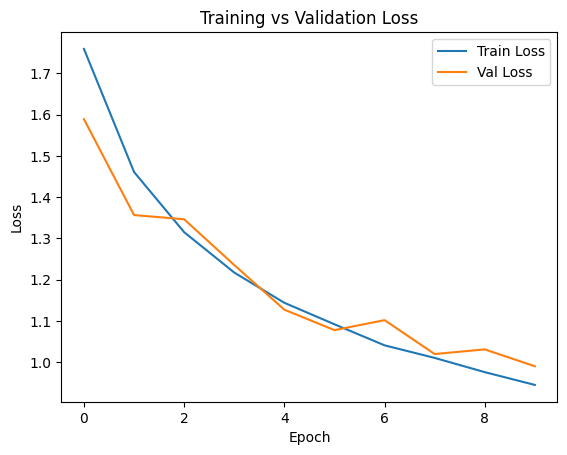

0.641463963110431

In [9]:
evaluate_model(model_3, x_test, y_test, history_3)